**Philip Booth**

CS 251: Data Analysis and Visualization

Fall 2024

# Project 6 | Supervised Learning

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 4: Naive Bayes Classifier

After finishing your email preprocessing pipeline, implement the one other supervised learning algorithm we we will use to classify email, **Naive Bayes**.

### 4a. Implement Naive Bayes

In `naive_bayes.py`, implement the following methods:
- Constructor
- get methods
- `train(data, y)`: Train the Naive Bayes classifier so that it records the "statistics" of the training set: class priors (i.e. how likely an email is in the training set to be spam or ham?) and the class likelihoods (the probability of a word appearing in each class — spam or ham).
- `predict(data)`: Combine the class likelihoods and priors to compute the posterior distribution. The predicted class for a test sample is the class that yields the highest posterior probability.


#### Bayes rule ingredients: Priors and likelihood (`train`)

To compute class predictions (probability that a test example belong to either spam or ham classes), we need to evaluate **Bayes Rule**. This means computing the priors and likelihoods based on the training data.

**Prior:** $$P_c = \frac{N_c}{N}$$ where $P_c$ is the prior for class $c$ (spam or ham), $N_c$ is the number of training samples that belong to class $c$ and $N$ is the total number of training samples.

**Likelihood:** $$L_{c,w} = \frac{T_{c,w} + 1}{T_{c} + M}$$ where
- $L_{c,w}$ is the likelihood that word $w$ belongs to class $c$ (*i.e. what we are solving for*)
- $T_{c,w}$ is the total count of **word $w$** in emails that are only in class $c$ (*either spam or ham*)
- $T_{c}$ is the total count of **all words** that appear in emails of the class $c$ (*total number of words in all spam emails or total number of words in all ham emails*)
- $M$ is the number of features (*number of top words*).

#### Bayes rule ingredients: Posterior (`predict`)

To make predictions, we now combine the prior and likelihood to get the posterior:

**Log Posterior:** $$Log(\text{Post}_{i, c}) = Log(P_c) + \sum_{j \in J_i}x_{i,j}Log(L_{c,j})$$

 where
- $\text{Post}_{i,c}$ is the posterior for class $c$ for test sample $i$(*i.e. evidence that email $i$ is spam or ham*). We solve for its logarithm.
- $Log(P_c)$ is the logarithm of the prior for class $c$.
- $x_{i,j}$ is the number of times the jth word appears in the ith email.
- $Log(L_{c,j})$: is the log-likelihood of the jth word in class $c$.

In [80]:
from naive_bayes import NaiveBayes

#### Test `train`

###### Class priors and likelihoods

The following test should be used only if storing the class priors and likelihoods directly.

In [81]:
num_test_classes = 4
np.random.seed(0)
data_test = np.random.randint(low=0, high=20, size=(100, 6))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_test, y_test)

print(f'Your class priors are: {nbc.get_priors()}\nand should be          [0.28 0.22 0.32 0.18].')
print(f'Your class likelihoods shape is {nbc.get_likelihoods().shape} and should be (4, 6).')
print(f'Your likelihoods are:\n{nbc.get_likelihoods()}')

print('and should be')
print('''[[0.15997 0.15091 0.2079  0.19106 0.14184 0.14832]
 [0.11859 0.16821 0.17914 0.16905 0.18082 0.18419]
 [0.16884 0.17318 0.14495 0.14332 0.18784 0.18187]
 [0.16126 0.17011 0.15831 0.13963 0.18977 0.18092]]''')

Your class priors are: [-1.27297 -1.51413 -1.13943 -1.7148 ]
and should be          [0.28 0.22 0.32 0.18].
Your class likelihoods shape is (4, 6) and should be (4, 6).
Your likelihoods are:
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]
and should be
[[0.15997 0.15091 0.2079  0.19106 0.14184 0.14832]
 [0.11859 0.16821 0.17914 0.16905 0.18082 0.18419]
 [0.16884 0.17318 0.14495 0.14332 0.18784 0.18187]
 [0.16126 0.17011 0.15831 0.13963 0.18977 0.18092]]


###### Log of class priors and likelihoods

This test should be used only if storing the log of the class priors and likelihoods.

In [82]:
num_test_classes = 4
np.random.seed(0)
data_test = np.random.randint(low=0, high=20, size=(100, 6))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_test, y_test)

print(f'Your log class priors are: {nbc.get_priors()}\nand should be              [-1.27297 -1.51413 -1.13943 -1.7148 ].')
print(f'Your log class likelihoods shape is {nbc.get_likelihoods().shape} and should be (4, 6).')
print(f'Your log likelihoods are:\n{nbc.get_likelihoods()}')


print('and should be')
print('''[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]''')

Your log class priors are: [-1.27297 -1.51413 -1.13943 -1.7148 ]
and should be              [-1.27297 -1.51413 -1.13943 -1.7148 ].
Your log class likelihoods shape is (4, 6) and should be (4, 6).
Your log likelihoods are:
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]
and should be
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]


#### Test `predict`

In [83]:
num_test_classes = 4
np.random.seed(0)
data_train = np.random.randint(low=0, high=15, size=(100, 10))
data_test = np.random.randint(low=0, high=15, size=(15, 10))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_train, y_test)
test_y_pred = nbc.predict(data_test)

print(f'Your predicted classes are\n{test_y_pred}\nand should be\n[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]]')

Your predicted classes are
[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]
and should be
[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]]


### 4b. Spam filtering

Use your Naive Bayes classifier to predict whether emails in the Enron email dataset are spam! Start by running the following code that uses `np.load` to load in the train/test split that you created last week.


In [84]:
x_train = np.load('data/email_train_x.npy')
y_train = np.load('data/email_train_y.npy')
inds_train = np.load('data/email_train_inds.npy')
x_test = np.load('data/email_test_x.npy')
y_test = np.load('data/email_test_y.npy')
inds_test = np.load('data/email_test_inds.npy')

In [85]:
nb_classifier = NaiveBayes(2)

nb_classifier.train(x_train,y_train)
y_pred = nb_classifier.predict(x_test)

nb_classifier.accuracy(y_test,y_pred)


0.8718773946360153

### 4c. Questions

**Question 7:** What accuracy do you get on the test set with Naive Bayes. It should be roughly 89%.

**Answer 7:**
I got 87.18%

### 4d. Confusion matrix

To get a better sense of the errors that the Naive Bayes classifier makes, implement the `confusion_matrix` method in `Classifer` then create a confusion matrix of the spam classification results. Assign the confusion matrix below to the variable `conf_matrix_nb` and run the code below to help test your confusion matrix.

In [86]:
conf_matrix_nb = NaiveBayes.confusion_matrix(nb_classifier,y_test,y_pred)

print(conf_matrix_nb)

[[3052.  233.]
 [ 603. 2637.]]


#### Test confusion matrix

In [87]:
print(f'The total number of entries in your confusion matrix is {int(conf_matrix_nb.sum())} and should be {len(y_test)}.')
print(f'The total number of ham entries in your confusion matrix is {int(conf_matrix_nb[0].sum())} and should be {int(np.sum(y_test == 0))}.')
print(f'The total number of spam entries in your confusion matrix is {int(conf_matrix_nb[1].sum())} and should be {int(np.sum(y_test == 1))}.')

The total number of entries in your confusion matrix is 6525 and should be 6525.
The total number of ham entries in your confusion matrix is 3285 and should be 3285.
The total number of spam entries in your confusion matrix is 3240 and should be 3240.


### 4e. Questions

**Question 8:** Interpret the confusion matrix, using the convention that positive detection means spam (*e.g. a false positive means classifying a ham email as spam*). What types of errors are made more frequently by the classifier? What does this mean (*i.e. X (spam/ham) is more likely to be classified than Y (spam/ham) than the other way around*)?

**Answer 8:** The error made most frequently is the false positive classification of ham as spam. My confusion matrix tells me that ham was misclassified 603 times. Spam is misclassified 233 time which is not as bad. From our confusion matrix we can conclude that ham is more likely to be misclassified as spam. In a real world environment this is likely much worse because if an important email is hidden in the spam folder then that could put you in a bad position.


## Task 5: Comparison with KNN

In [88]:
from knn import KNN

### 5a. KNN spam email classification accuracy
Run a similar analysis to what you did with Naive Bayes above. When computing accuracy on the test set, you may want to reduce the size of the test set (e.g. to the first 500 emails in the test set).

In [89]:
x_train = np.load('data/email_train_x.npy')
y_train = np.load('data/email_train_y.npy')
inds_train= np.load('data/email_train_inds.npy')
x_test = np.load('data/email_test_x.npy')
y_test = np.load('data/email_test_y.npy')
inds_test = np.load('data/email_test_inds.npy')

In [90]:
knn_classifier = KNN(2)
print(y_test.shape)
knn_classifier.train(x_train,y_train)
x_test_reduce = x_test[:500]
y_test_reduce = y_test[:500]
knn_y_pred = knn_classifier.predict(x_test_reduce,2)
knn_classifier.accuracy(y_test_reduce,knn_y_pred)

(6525,)


0.866

### 5b. KNN spam email confusion matrix

In the cell below, create a confusion matrix for your KNN classifier results

In [91]:
conf_matrix_knn = knn_classifier.confusion_matrix(y_test[:500],knn_y_pred[:500])
print(conf_matrix_knn)

[[229.  14.]
 [ 53. 204.]]


### 5c. Questions

**Question 9:** What accuracy did you get on the test set (potentially reduced in size)?


**Question 10:** How does the confusion matrix compare to that obtained by Naive Bayes (*If you reduced the test set size, keep that in mind*)?

**Question 11:** What is the primary benefit and downside of KNN that we observe here compared to Naive Bayes?

**Question 12:** When potentially reducing the size of the test set here, why is it important that we shuffled our train and test set?

**Answer 9:** 
KNN Accuracy for 500 samples: .866 

**Answer 10:**
I did reduce the size so the values in my confusion matrix are quite different from that of the naive bayes cmat. However, the ratios between different boxes still possess strong similarity to the naive bayes confusion matrix. The corresponding accuracy of the KNN classifier was 86.6 which is nearly the same as the 87% accuracy for the naive bayes. Note that the KNN predicted the model on fewer points than naive bayes.

**Answer 11:** 
Pro: KNN has an easier training process to naive bayes. Coming from an implementation standpoint I would say the train method for naive bayes took the longest to code, versus knn being quite easy to code. Con: KNN has a slow prediction runtime so I had to reduce the data set. Even then it was pretty slow compared to NB.

**Answer 12:** 
It's important that we shuffled our train and test set because if we were to split test and train by first 80% of data to train and last 20% to test, then that data would have been taken sequentially. The first 80% of points to train versus the last 20% allocated to the test. By shuffling we guarantee the data randomly distributed so both the training and testing model are representative of the entire data set. 

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 2. Feature size

- Explore how the number of selected features for the email dataset influences accuracy and runtime performance.

I would measure impact of increasing the number of data points included in the model in naive bayes versus knn. We know that Knn takes longer to train but slower to predict, while Naive bayes is longer to train but faster to predict. Naive bayes is quicker but by how much. For this extension I will examine runtimes of increasingly more data points included, comparing accuracies as well.

In [92]:
import timeit
start_time100 = timeit.default_timer()
#nb_classifier = NaiveBayes(2)
nb_classifier.train(x_train,y_train)
x_test_reduce100 = x_test[:100]
y_test_reduce100 = y_test[:100]
y_pred = nb_classifier.predict(x_test_reduce100)
print(nb_classifier.accuracy(y_test_reduce100,y_pred))
elapsed100 = timeit.default_timer() - start_time100
print(elapsed100)

0.89
0.033494125003926456


In [93]:
start_time200 = timeit.default_timer()
#nb_classifier = NaiveBayes(2)
nb_classifier.train(x_train,y_train)
x_test_reduce200 = x_test[:1000]
y_test_reduce200 = y_test[:1000]
y_pred = nb_classifier.predict(x_test_reduce200)
print(nb_classifier.accuracy(y_test_reduce200,y_pred))
elapsed200 = timeit.default_timer() - start_time200
print(elapsed200)

0.866
0.023662000021431595


In [94]:
start_time300 = timeit.default_timer()
#nb_classifier = NaiveBayes(2)
nb_classifier.train(x_train,y_train)
x_test_reduce300 = x_test[:5000]
y_test_reduce300 = y_test[:5000]
y_pred = nb_classifier.predict(x_test_reduce300)
print(nb_classifier.accuracy(y_test_reduce300,y_pred))
elapsed300 = timeit.default_timer() - start_time300
print(elapsed300)


0.8702
0.03893020795658231


In [95]:
start_time400 = timeit.default_timer()
#nb_classifier = NaiveBayes(2)
nb_classifier.train(x_train,y_train)
x_test_reduce400 = x_test[:10000]
y_test_reduce400 = y_test[:10000]
y_pred = nb_classifier.predict(x_test_reduce400)
print(nb_classifier.accuracy(y_test_reduce400,y_pred))
elapsed400 = timeit.default_timer() - start_time400
print(elapsed400)


0.8718773946360153
0.027162957994733006


In [96]:
#nb_classifier = NaiveBayes(2)
start_time500 = timeit.default_timer()
nb_classifier.train(x_train,y_train)
x_test_reduce500 = x_test[:15000]
y_test_reduce500 = y_test[:15000]
y_pred = nb_classifier.predict(x_test_reduce500)
print(nb_classifier.accuracy(y_test_reduce500,y_pred))
elapsed500 = timeit.default_timer() - start_time500
print(elapsed500)

0.8718773946360153
0.07640149997314438


As we can see from running these chunks with naive bayes classifying from 100 points up to 15000 points the difference in time is minimal as one increases the data points to be classified. 

Moving on to knn lets see what happens as we increase classification from 100-500 points

In [97]:
import timeit
start_time100 = timeit.default_timer()
knn_classifier = KNN(2)
knn_classifier.train(x_train,y_train)
x_test_reduce100 = x_test[:100]
y_test_reduce100 = y_test[:100]
y_pred = knn_classifier.predict(x_test_reduce100,2)
print(nb_classifier.accuracy(y_test_reduce100,y_pred))
elapsed100 = timeit.default_timer() - start_time100
print(elapsed100)

0.9
1.2512249579885975


In [98]:
start_time200 = timeit.default_timer()
knn_classifier.train(x_train,y_train)
x_test_reduce200 = x_test[:200]
y_test_reduce200 = y_test[:200]
y_pred = knn_classifier.predict(x_test_reduce200,2)
print(nb_classifier.accuracy(y_test_reduce200,y_pred))
elapsed200 = timeit.default_timer() - start_time200
print(elapsed200)

0.87
2.2070379589567892


In [99]:
start_time300 = timeit.default_timer()
knn_classifier.train(x_train,y_train)
x_test_reduce300 = x_test[:300]
y_test_reduce300 = y_test[:300]
y_pred = knn_classifier.predict(x_test_reduce300,2)
print(nb_classifier.accuracy(y_test_reduce300,y_pred))
elapsed300 = timeit.default_timer() - start_time300
print(elapsed300)

0.87
4.00452520797262


In [100]:
start_time400 = timeit.default_timer()
knn_classifier.train(x_train,y_train)
x_test_reduce400 = x_test[:400]
y_test_reduce400 = y_test[:400]
y_pred = knn_classifier.predict(x_test_reduce400,2)
print(nb_classifier.accuracy(y_test_reduce400,y_pred))
elapsed400 = timeit.default_timer() - start_time400
print(elapsed400)

0.8525
5.676385416998528


In [101]:
start_time500 = timeit.default_timer()
knn_classifier.train(x_train,y_train)
x_test_reduce500 = x_test[:500]
y_test_reduce500 = y_test[:500]
y_pred = knn_classifier.predict(x_test_reduce500,2)
print(nb_classifier.accuracy(y_test_reduce500,y_pred))
elapsed500 = timeit.default_timer() - start_time500
print(elapsed500)

0.866
6.834399291023146


To conclude about this extension as we look at the times it takes to classify data points it becomes clear how truly efficient naive bayes is over knn. Classifying 15000 points for naive bayes was quicker than processing 100 for knn. With every increase in 100 points to classify, knn needs on average another 1 second to computes. To investigate further into runtimes, I looked at knn's predict function which presumably explains the bulk of its runtime. Knn uses a nested for loop in it's predict function one of the loops iterates over every sample rather in naive bayes which doesn't need any loops. The only loop is in the train class and iterates over every class feature, which in it's case was 4. To round off this extension I will present two graph which aim to illustrate the difference in runtimes for these two classifiers.

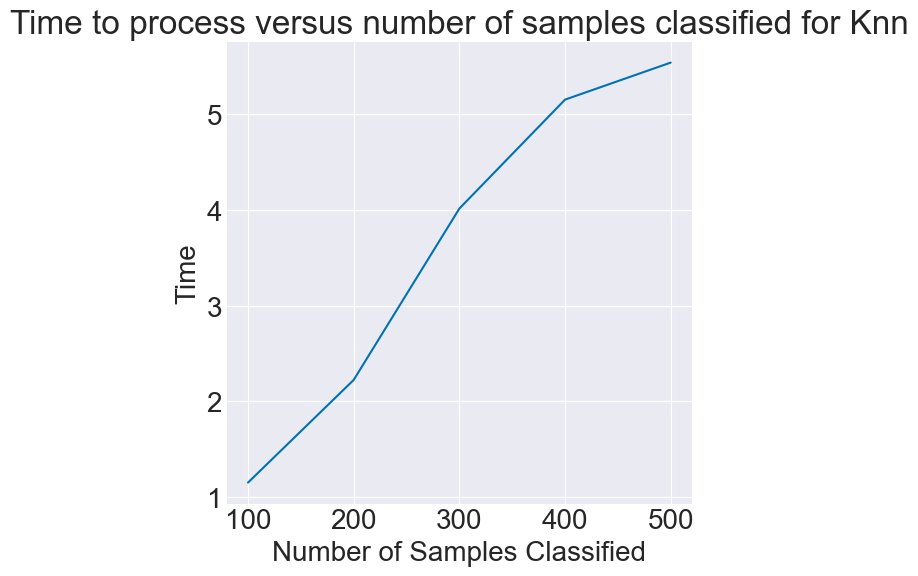

In [104]:
knn_rt = [1.1498252500314265,2.2235337079619057,4.015748624980915,5.154872915998567,5.542208375001792]
knn_numsamps = [100,200,300,400,500]

plt.figure(figsize=(6,6))
plt.plot(knn_numsamps, knn_rt)
plt.xlabel('Number of Samples Classified')
plt.ylabel('Time')
plt.title('Time to process versus number of samples classified for Knn')
plt.show()

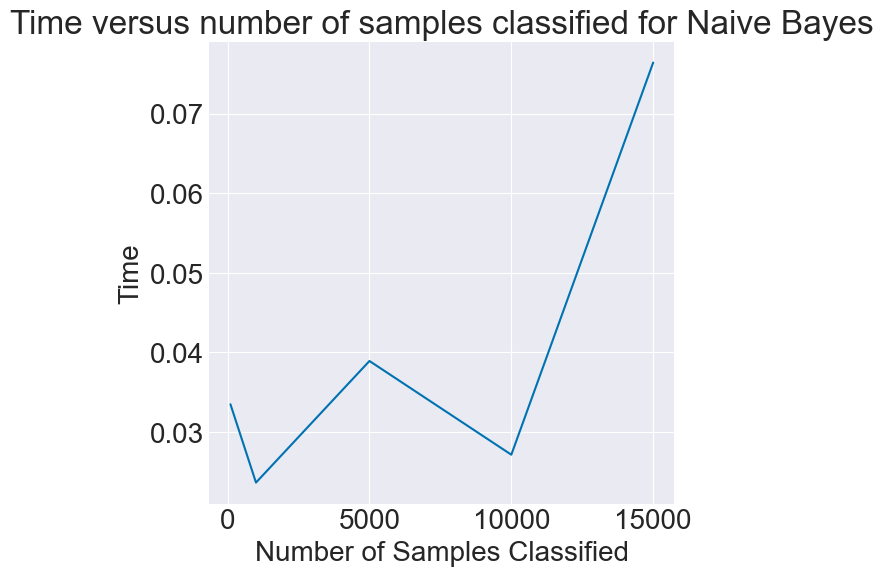

In [105]:
nb_rt = [0.033494125003926456,0.023662000021431595,0.03893020795658231,0.027162957994733006,0.07640149997314438]
nb_numsamps = [100,1000,5000,10000,15000]

plt.figure(figsize=(6,6))
plt.plot(nb_numsamps, nb_rt)
plt.xlabel('Number of Samples Classified')
plt.ylabel('Time')
plt.title('Time versus number of samples classified for Naive Bayes')
plt.show()

### 3. Distance metrics
For my second extension I compared the accuracy of computing euclidean distance versus manhattan distance. I'm going to hypothesize that the manhattan distance will result in a less accurate classification because it calculates distance less precisely, by just adding the x and y of a right triangle rather than finding the hypotenuse.

For the experiment, I set up 2 knn classifiers, the first which will predict using euclidean distance and the second which will predict using manhattan distance. Let's see what results from the experiment

In [106]:
knn_classifier.train(x_train,y_train)
x_test_reduce500 = x_test[:500]
y_test_reduce500 = y_test[:500]
y_pred = knn_classifier.predict(x_test_reduce500,2)
print(nb_classifier.accuracy(y_test_reduce500,y_pred))


0.866


In [110]:
knn_classifier.train(x_train,y_train)
x_test_reduce500 = x_test[:500]
y_test_reduce500 = y_test[:500]
y_pred = knn_classifier.predict_mahnattan(x_test_reduce500,2)
print(nb_classifier.accuracy(y_test_reduce500,y_pred))


0.888


These results were the opposite of what I expected. The euclidean distance was a similar time operation but had a worse accuracy. Instead manhattan won this bout with a 2% stronger accuracy. To conclude, I would urge other students or researchers to implement manhattan distance into their knn implementation. If not, then they should explain to me the downsides which I hyothesize to be some lack of precision in certain models. I'm guessing in datasets where points are close together. I also wonder which prediction distance calculation the built-in knn uses between euclidean and manhattan. It would be cool to know.